In [ ]:
pip install category_encoders

In [2]:
# STANDARD LIBRARIES
import os
import warnings
warnings.filterwarnings("ignore")

# THIRD PARTY LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import scipy.stats as stats
import category_encoders as ce

#statistical tests
from scipy import stats
from scipy.stats import pearsonr, spearmanr



# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import sklearn.linear_model
import sklearn.feature_selection
import sklearn.preprocessing
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.feature_selection import RFE
import matplotlib
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from math import sqrt

In [3]:
import acquire 
import prepare

In [18]:
df = acquire.get_fifa_data()

In [19]:
df = prepare.prepped_data(df)

Before dropping nulls, 142079 rows, 111 cols
After dropping nulls. 131489 rows. 66 cols
After cleaning the data and adding additional columns there are: 98804 rows. 83 cols


In [20]:
goalkeeper_df, forward_df, midfielder_df, defender_df = prepare.acquire_players_by_position(df)

In [ ]:
goalkeeper_df.he

# Step 1: Assign all player positions to a dataframe

In [ ]:
#GK
goalkeepers = df[(df.club_position == 'GK')]

In [ ]:
goalkeepers.shape

In [ ]:
#ST, RS, LS, LW, RW, LF, CF
forwards = df[(df.club_position == 'ST') | (df.club_position == 'RS') | (df.club_position == 'LS') | (df.club_position == 'LW') | (df.club_position == 'RW') | (df.club_position == 'LF') | (df.club_position == 'CF')]


In [ ]:
forwards.shape

In [ ]:
#LCM, RCM, RM, LM, CAM, LDM, RDM, CDM, LAM, RAM 
midfielders = df[(df.club_position == 'LCM') | (df.club_position == 'RCM') | (df.club_position == 'RM') | (df.club_position == 'LM') | (df.club_position == 'CAM') | (df.club_position == 'LDM') | (df.club_position == 'RDM') | (df.club_position == 'CDM') | (df.club_position == 'LAM') | (df.club_position == 'RAM')] 


In [ ]:
midfielders.shape

In [ ]:
#RCB, LCB, LB, RB, CB, RWB, LWB
defenders = df[(df.club_position == 'RCB') | (df.club_position == 'LCB') | (df.club_position == 'LB') | (df.club_position == 'RB') | (df.club_position == 'CB') | (df.club_position == 'RWB') | (df.club_position == 'LWB')]

In [ ]:
defenders.shape

In [ ]:
reserve = df[df.club_position == 'RES']


In [ ]:
reserve.shape

In [ ]:
substitute = df[df.club_position == 'SUB']

In [ ]:
substitute.shape

In [ ]:
df.shape

# Step 2: Separate RESERVE Player dataframe by player position

In [ ]:
reserve.shape

In [ ]:
reserve['player_positions'] = reserve['player_positions'].str.split(',').str[0]

In [ ]:
df_reserve_goalkeepers = reserve[reserve.player_positions == 'GK']

In [ ]:
df_reserve_goalkeepers.shape

In [ ]:
#ST, RS, LS, LW, RW, LF, CF
df_reserve_forwards = reserve[(reserve.player_positions == 'ST') | (reserve.player_positions == 'RW') | (reserve.player_positions == 'LW') | (reserve.player_positions == 'CF')]

In [ ]:
df_reserve_forwards.shape

In [ ]:
#LCM, RCM, RM, LM, CAM, LDM, RDM, CDM, LAM, RAM 
df_reserve_midfielders = reserve[(reserve.player_positions == 'CM') | (reserve.player_positions == 'CDM') | (reserve.player_positions == 'CAM') | (reserve.player_positions == 'RM') | (reserve.player_positions == 'LM')]

In [ ]:
df_reserve_midfielders.shape

In [ ]:
#RCB, LCB, LB, RB, CB, RWB, LWB
df_reserve_defenders = reserve[(reserve.player_positions == 'CB') | (reserve.player_positions == 'LB') | (reserve.player_positions == 'RB') | (reserve.player_positions == 'LWB') | (reserve.player_positions == 'RWB')]

In [ ]:
df_reserve_defenders.shape

# Step 3: Separate SUBSTITUTE Player dataframe by player position

In [ ]:
substitute.shape

In [ ]:
substitute['player_positions'] = substitute['player_positions'].str.split(',').str[0]


In [ ]:
df_substitute_goalkeeper = substitute[substitute.player_positions == 'GK']

In [ ]:
df_substitute_goalkeeper.shape

In [ ]:
df_substitute_forward = substitute[(substitute.player_positions == 'ST') | (substitute.player_positions == 'RW') | (substitute.player_positions == 'LW') | (substitute.player_positions == 'CF')]

In [ ]:
df_substitute_forward.shape

In [ ]:
df_substitute_midfielders = substitute[(substitute.player_positions == 'CM') | (substitute.player_positions == 'CDM') | (substitute.player_positions == 'CAM') | (substitute.player_positions == 'LM') | (substitute.player_positions == 'RM')]

In [ ]:
df_substitute_midfielders.shape

In [ ]:
df_substitute_defenders = substitute[(substitute.player_positions == 'CB') | (substitute.player_positions == 'LB') | (substitute.player_positions == 'RB') | (substitute.player_positions == 'RWB') | (substitute.player_positions == 'LWB')]

In [ ]:
df_substitute_defenders.shape

# Step 4: Concat Dataframes together 


In [ ]:
goalkeeper_df = pd.concat([goalkeepers, df_substitute_goalkeeper, df_reserve_goalkeepers], axis=0)

In [ ]:
forward_df = pd.concat([forwards, df_substitute_forward, df_reserve_forwards], axis=0)

In [ ]:
midfielder_df = pd.concat([midfielders, df_substitute_midfielders, df_reserve_midfielders], axis=0)

In [ ]:
defender_df = pd.concat([defenders, df_substitute_defenders, df_reserve_defenders], axis=0)

# Step 5: Correlation for each position

In [58]:
goalkeeper_df.corr()[['wage_eur']].sort_values(by='wage_eur', ascending=False).head(17)

,wage_eur
wage_year,1.00
wage_eur,1.00
total_wage,0.76
value_eur,0.76
international_reputation,0.71
club_name_yr_sum,0.67
overall,0.62
gk_diving,0.59
gk_reflexes,0.59
gk_handling,0.58


In [ ]:
forward_df.corr()[['wage_eur']].sort_values(by='wage_eur', ascending=False).head(10)

In [ ]:
midfielder_df.corr()[['wage_eur']].sort_values(by='wage_eur', ascending=False).head(10)

In [ ]:
defender_df.corr()[['wage_eur']].sort_values(by='wage_eur', ascending=False).head(15)

# Clusters based on Correlation

_Prepare the Data_

In [7]:
#split
train, validate, test = prepare.split(goalkeeper_df)

Train: 6779 rows, 83 cols
Validate: 2969 rows, 83 cols
Test: 1619 rows, 83 cols


In [8]:
#split data
X_train = train.drop(columns=['wage_eur', 'total_wage', 'value_eur'])
y_train = train[['wage_eur']]

X_validate = validate.drop(columns=['wage_eur', 'total_wage', 'value_eur'])
y_validate = validate[['wage_eur']]

X_test = test.drop(columns=['wage_eur', 'total_wage', 'value_eur'])
y_test = test[['wage_eur']]

_Encode categorical variables_ 

In [9]:
#encode categorical variables
encoder = ce.LeaveOneOutEncoder(return_df=True)
X_train_loo = encoder.fit_transform(X_train, y_train)
X_test_loo = encoder.transform(X_test)
X_train_loo.shape

(6779, 80)

In [10]:
#scale data 
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_loo, y_train)
X_train_scaled.shape

(6779, 80)

In [11]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled_df.describe()

,sofifa_id,short_name,player_positions,overall,potential,age,height_cm,weight_kg,club_team_id,club_name,...,league_yr_sum,club_name_yr_sum,seniority,club_position_encoded,work_rate_encoded,preferred_foot_encoded,age_bins_encoded,weight_bins_encoded,body_type_encoded,league_encoded
count,"6,779.00","6,779.00","6,779.00","6,779.00","6,779.00","6,779.00","6,779.00","6,779.00","6,779.00","6,779.00",...,"6,779.00","6,779.00","6,779.00","6,779.00","6,779.00","6,779.00","6,779.00","6,779.00","6,779.00","6,779.00"
mean,-0.28,0.62,-0.90,0.06,0.01,0.03,-0.01,0.03,0.40,0.49,...,0.55,0.59,0.40,-0.02,0.00,-0.10,0.29,467.16,0.06,0.22
std,0.98,2.27,2.74,0.74,0.69,0.69,0.79,0.78,0.48,1.31,...,1.30,1.66,0.90,0.86,0.00,0.30,0.45,"1,691.53",1.35,0.81
min,-4.67,-0.77,-37.00,-1.73,-2.20,-1.25,-3.83,-3.00,-0.02,-0.46,...,-0.56,-0.40,-0.33,-1.00,0.00,-1.00,-0.01,"-5,906.01",-3.00,-0.71
25%,-0.62,-0.54,-0.75,-0.45,-0.50,-0.50,-0.50,-0.50,-0.01,-0.26,...,-0.34,-0.22,-0.33,-1.00,0.00,0.00,-0.00,-0.71,0.00,-0.36
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.38,0.46,0.25,0.55,0.50,0.50,0.50,0.50,0.99,0.74,...,0.66,0.78,0.67,0.00,0.00,0.00,1.00,0.29,0.00,0.64
max,0.83,27.82,0.44,2.55,2.50,2.38,3.33,3.50,1.01,8.72,...,4.63,12.79,8.67,1.43,0.00,0.00,1.00,"4,359.85",6.00,2.64


# Goalkeeper Clusters

#### ANOVA test on gk_handling, gk_diving, gk_reflexes

In [12]:
#significance level 
a = 0.05 
#define x 
X = X_train_scaled_df[['gk_handling', 'gk_diving', 'gk_reflexes']]
#define kmeans
kmeans = KMeans(n_clusters=4)
#fit 
kmeans.fit(X)

KMeans(n_clusters=4)

In [28]:
train['clusters'] = kmeans.predict(X)

X_train_scaled_df['clusters'] = kmeans.predict(X)

In [29]:
X_train_scaled_df

,sofifa_id,short_name,player_positions,overall,potential,age,height_cm,weight_kg,club_team_id,club_name,...,club_name_yr_sum,seniority,club_position_encoded,work_rate_encoded,preferred_foot_encoded,age_bins_encoded,weight_bins_encoded,body_type_encoded,league_encoded,clusters
0,-0.90,7.96,-22.00,1.82,1.60,0.12,0.67,-0.25,-0.02,3.84,...,6.61,0.67,-1.00,0.00,0.00,-0.01,-25.29,0.00,-0.50,1
1,-0.36,5.76,-5.75,1.09,0.70,0.38,0.50,0.25,-0.02,1.48,...,2.26,0.33,-1.00,0.00,0.00,-0.00,-6.71,1.00,-0.50,1
2,-0.21,6.91,-9.50,1.09,1.10,-0.38,-0.67,-0.12,-0.02,1.31,...,3.06,2.00,-1.00,0.00,-1.00,-0.00,-11.00,-2.00,-0.50,1
3,-1.54,3.61,-9.50,1.45,1.10,0.62,-1.00,0.62,-0.02,0.95,...,1.42,0.67,-1.00,0.00,0.00,1.00,-11.00,-2.00,-0.50,1
4,-1.01,7.76,-15.75,1.64,1.30,0.38,-0.50,0.00,-0.02,1.78,...,1.83,2.00,-1.00,0.00,0.00,-0.00,-18.14,0.00,-0.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6774,0.79,0.46,0.37,-1.09,-0.70,-0.75,-0.17,-0.50,-0.00,-0.40,...,-0.30,-0.33,1.43,0.00,-1.00,0.00,0.29,1.00,0.21,2
6775,0.80,0.46,0.44,-0.91,-0.30,-1.00,1.00,1.38,0.98,-0.34,...,-0.20,-0.33,1.43,0.00,0.00,0.00,"4,359.85",3.00,0.21,2
6776,0.81,0.46,0.44,-1.18,-0.80,-1.00,0.50,0.75,0.99,-0.35,...,-0.27,-0.33,1.43,0.00,0.00,0.00,0.36,0.00,0.21,2
6777,0.82,0.46,0.44,-1.09,-0.90,-0.62,1.00,0.88,0.99,-0.41,...,-0.39,-0.33,1.43,0.00,0.00,0.00,0.36,1.00,0.21,2


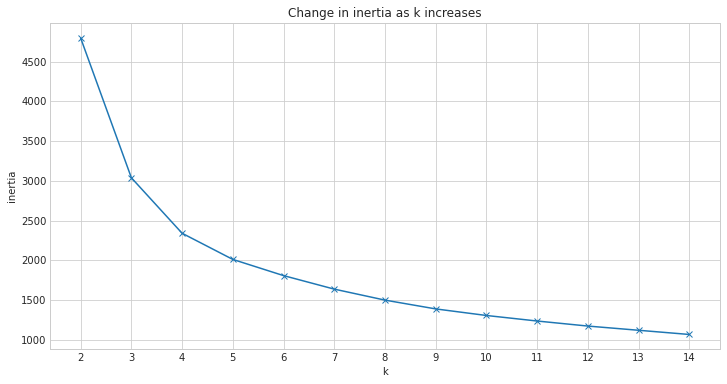

In [14]:
# Find K: evaluate best k using elbow method 
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 15)}).plot(marker='x')
    plt.xticks(range(2, 15))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [15]:
train.groupby('clusters')[ 'gk_handling', 'gk_diving', 'gk_reflexes'].median()

,gk_handling,gk_diving,gk_reflexes
clusters,,,
0,60.00,63.00,64.00
1,75.00,78.00,80.00
2,53.00,56.00,56.00
3,67.00,70.00,71.00


In [16]:
train.groupby('clusters')[ 'gk_handling', 'gk_diving', 'gk_reflexes'].mean()

,gk_handling,gk_diving,gk_reflexes
clusters,,,
0,60.20,63.04,63.86
1,75.46,78.53,79.94
2,52.54,55.37,55.65
3,66.95,69.85,71.35


In [24]:
testing = pd.concat([train[['clusters', 'gk_handling', 'gk_diving', 'gk_reflexes']], y_train], axis = 1)
testing

,clusters,gk_handling,gk_diving,gk_reflexes,wage_eur
214,1,79,85,87,"180,000.00"
454,1,75,76,76,"50,000.00"
687,1,71,78,83,"80,000.00"
914,1,81,77,90,"80,000.00"
1121,1,78,83,82,"130,000.00"
...,...,...,...,...,...
93415,2,54,56,54,"1,000.00"
93596,2,61,59,52,500.00
94075,2,45,53,58,500.00
94349,2,56,58,58,500.00


In [25]:
testing.groupby('clusters')[ 'gk_handling', 'gk_diving', 'gk_reflexes', 'wage_eur'].mean()

,gk_handling,gk_diving,gk_reflexes,wage_eur
clusters,,,,
0,60.20,63.04,63.86,"3,050.35"
1,75.46,78.53,79.94,"45,369.76"
2,52.54,55.37,55.65,"1,551.16"
3,66.95,69.85,71.35,"10,263.68"


In [31]:
# testing2 = pd.concat([X_train_scaled_df[['clusters', 'gk_handling', 'gk_diving', 'gk_reflexes']], y_train], axis = 1)
# testing2

In [57]:
train.clusters1 = train[['clusters', 'gk_handling', 'gk_diving', 'gk_reflexes', 'club_name_yr_sum', 'overall']].copy()
# validate.clusters1 = validate[['clusters', 'gk_handling', 'gk_diving', 'gk_reflexes', 'club_name_yr_sum', 'overall']].copy()

In [54]:
train.clusters1

,clusters,gk_handling,gk_diving,gk_reflexes,club_name_yr_sum,overall
214,1,79,85,87,"991,694,600.00",84
454,1,75,76,76,"375,746,800.00",76
687,1,71,78,83,"489,892,000.00",76
914,1,81,77,90,"258,094,200.00",80
1121,1,78,83,82,"314,852,200.00",82
...,...,...,...,...,...,...
93415,2,54,56,54,"14,177,800.00",52
93596,2,61,59,52,"29,036,800.00",54
94075,2,45,53,58,"18,314,400.00",51
94349,2,56,58,58,"1,742,000.00",52


1. clusters in the validate dataframe
2. clusters in the test dataframe
3. creating a dataframe with the features that you want

In [55]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data
lm.fit(train.clusters1, y_train.wage_eur)

# predict train
y_train['wage_eur_pred_lm'] = lm.predict(train.clusters1)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.wage_eur, y_train.wage_eur_pred_lm)**(1/2)

predict validate
y_validate['wage_eur_pred_lm'] = lm.predict(validate)

# evaluate: rmse
rmse_validate_lm = mean_squared_error(y_validate.wage_eur, y_validate.wage_eur_pred_lm)**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", f'{rmse_train:.2f}', 
      "\nValidation/Out-of-Sample: ", f'{rmse_validate_lm:.2f}')

RMSE for OLS using LinearRegression
Training/In-Sample:  14079.77


In [ ]:
, 
      "\nValidation/Out-of-Sample: ", f'{rmse_validate_lm:.2f}'

#### _The ANOVA test will be used to measure the significance or lack there of variance between clusters_

 - H0: There is no significant difference between salaries of each cluster 
 - HA: There is a significant difference between salaries of each cluster

In [17]:
alpha = 0.05

F, p = stats.f_oneway(train[train.clusters == 0].wage_eur,
                      train[train.clusters == 1].wage_eur,
                      train[train.clusters == 2].wage_eur,
                      train[train.clusters == 3].wage_eur)

print('Anova Test Results on goalkeeper handling/diving/reflexes Cluster')
print('F-value: ',F)
print('p-value: ',p)
#if p > alpha:
    #print("\nWe fail to reject null hypothesis.")
#elif t < 0:
    #print("We fail to reject null hypothesis.")
#else:
    #print("We reject null hypothesis.\n\n")

Anova Test Results on goalkeeper handling/diving/reflexes Cluster
F-value:  1901.8288582344492
p-value:  0.0


# Prepare Forwards

In [ ]:
#split
train, validate, test = prepare.split(forward_df)

In [ ]:
#split data
X_train = train.drop(columns=['wage_eur', 'total_wage', 'value_eur'])
y_train = train[['wage_eur']]

X_validate = validate.drop(columns=['wage_eur', 'total_wage', 'value_eur'])
y_validate = validate[['wage_eur']]

X_test = test.drop(columns=['wage_eur', 'total_wage', 'value_eur'])
y_test = test[['wage_eur']]

In [ ]:
#encode categorical variables
encoder = ce.LeaveOneOutEncoder(return_df=True)
X_train_loo = encoder.fit_transform(X_train, y_train)
X_test_loo = encoder.transform(X_test)
X_train_loo.shape

In [ ]:
#scale data 
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_loo, y_train)
X_train_scaled.shape

In [ ]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# FORWARD CLUSTERS

#### ANOVA test on ball_control, reactions, dribbling

In [ ]:
#significance level 
a = 0.05 
#define x 
X = X_train_scaled_df[['ball_control', 'reactions', 'dribbling']]
#define kmeans
kmeans = KMeans(n_clusters=4)
#fit 
kmeans.fit(X)

In [ ]:
train['clusters'] = kmeans.predict(X)

In [ ]:
# Find K: evaluate best k using elbow method 
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 15)}).plot(marker='x')
    plt.xticks(range(2, 15))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [ ]:
train.groupby('clusters')[ 'ball_control', 'reactions', 'dribbling'].median()

#### _The ANOVA test will be used to measure the significance or lack there of variance between clusters_

 - H0: There is no significant difference between salaries of each cluster 
 - HA: There is a significant difference between salaries of each cluster

In [ ]:
alpha = 0.05

F, p = stats.f_oneway(train[train.clusters == 0].wage_eur,
                      train[train.clusters == 1].wage_eur,
                      train[train.clusters == 2].wage_eur,
                      train[train.clusters == 3].wage_eur)

print('Anova Test Results on goalkeeper handling/diving/reflexes Cluster')
print('F-value: ',F)
print('p-value: ',p)
#if p > alpha:
    #print("\nWe fail to reject null hypothesis.")
#elif t < 0:
    #print("We fail to reject null hypothesis.")
#else:
    #print("We reject null hypothesis.\n\n")

# Prepare Midfielders

In [ ]:
#split
train, validate, test = prepare.split(midfielder_df)

In [ ]:
#split data
X_train = train.drop(columns=['wage_eur', 'total_wage', 'value_eur'])
y_train = train[['wage_eur']]

X_validate = validate.drop(columns=['wage_eur', 'total_wage', 'value_eur'])
y_validate = validate[['wage_eur']]

X_test = test.drop(columns=['wage_eur', 'total_wage', 'value_eur'])
y_test = test[['wage_eur']]

In [ ]:
#encode categorical variables
encoder = ce.LeaveOneOutEncoder(return_df=True)
X_train_loo = encoder.fit_transform(X_train, y_train)
X_test_loo = encoder.transform(X_test)
X_train_loo.shape

In [ ]:
#scale data 
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_loo, y_train)
X_train_scaled.shape

In [ ]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Midfielder Cluster

#### ANOVA test on ball_control, reactions, passing

In [ ]:
#significance level 
a = 0.05 
#define x 
X = X_train_scaled_df[['ball_control', 'reactions', 'passing']]
#define kmeans
kmeans = KMeans(n_clusters=4)
#fit 
kmeans.fit(X)

In [ ]:
train['clusters'] = kmeans.predict(X)

In [ ]:
# Find K: evaluate best k using elbow method 
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 15)}).plot(marker='x')
    plt.xticks(range(2, 15))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [ ]:
train.groupby('clusters')[ 'ball_control', 'reactions', 'passing'].median()

#### _The ANOVA test will be used to measure the significance or lack there of variance between clusters_

 - H0: There is no significant difference between salaries of each cluster 
 - HA: There is a significant difference between salaries of each cluster

In [ ]:
alpha = 0.05

F, p = stats.f_oneway(train[train.clusters == 0].wage_eur,
                      train[train.clusters == 1].wage_eur,
                      train[train.clusters == 2].wage_eur,
                      train[train.clusters == 3].wage_eur)

print('Anova Test Results on goalkeeper handling/diving/reflexes Cluster')
print('F-value: ',F)
print('p-value: ',p)
#if p > alpha:
    #print("\nWe fail to reject null hypothesis.")
#elif t < 0:
    #print("We fail to reject null hypothesis.")
#else:
    #print("We reject null hypothesis.\n\n")

# Prepare Defenders

In [ ]:
#split
train, validate, test = prepare.split(defender_df)

In [ ]:
#split data
X_train = train.drop(columns=['wage_eur', 'total_wage', 'value_eur'])
y_train = train[['wage_eur']]

X_validate = validate.drop(columns=['wage_eur', 'total_wage', 'value_eur'])
y_validate = validate[['wage_eur']]

X_test = test.drop(columns=['wage_eur', 'total_wage', 'value_eur'])
y_test = test[['wage_eur']]

In [ ]:
#encode categorical variables
encoder = ce.LeaveOneOutEncoder(return_df=True)
X_train_loo = encoder.fit_transform(X_train, y_train)
X_test_loo = encoder.transform(X_test)
X_train_loo.shape

In [ ]:
#scale data 
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_loo, y_train)
X_train_scaled.shape

In [ ]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Defender Clusters 

#### ANOVA test on marking, potential, short_passing

In [ ]:
#significance level 
a = 0.05 
#define x 
X = X_train_scaled_df[['marking', 'potential', 'short_passing']]
#define kmeans
kmeans = KMeans(n_clusters=4)
#fit 
kmeans.fit(X)

In [ ]:
train['clusters'] = kmeans.predict(X)

In [ ]:
# Find K: evaluate best k using elbow method 
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 15)}).plot(marker='x')
    plt.xticks(range(2, 15))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [ ]:
train.groupby('clusters')[ 'ball_control', 'reactions', 'passing'].median()

#### _The ANOVA test will be used to measure the significance or lack there of variance between clusters_

 - H0: There is no significant difference between salaries of each cluster 
 - HA: There is a significant difference between salaries of each cluster

In [ ]:
alpha = 0.05

F, p = stats.f_oneway(train[train.clusters == 0].wage_eur,
                      train[train.clusters == 1].wage_eur,
                      train[train.clusters == 2].wage_eur,
                      train[train.clusters == 3].wage_eur)

print('Anova Test Results on goalkeeper handling/diving/reflexes Cluster')
print('F-value: ',F)
print('p-value: ',p)
#if p > alpha:
    #print("\nWe fail to reject null hypothesis.")
#elif t < 0:
    #print("We fail to reject null hypothesis.")
#else:
    #print("We reject null hypothesis.\n\n")